In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
import tensorflow as tf
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, concatenate, Dropout, Flatten, AvgPool2D,  Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D,Activation,Input
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import regularizers
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns 
import pandas as pd
import shutil
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
import keras
from matplotlib import pyplot as plt

In [2]:
img_height, img_width =128, 128
batch_size = 20
train_data_dir = "Dataset2/"
test_data_dir = "Test/"

# Create test directory and move 10% of the data to this directory
if not os.path.exists(test_data_dir):
    os.makedirs(test_data_dir)
    for class_name in os.listdir(train_data_dir):
        class_dir = os.path.join(train_data_dir, class_name)
        test_class_dir = os.path.join(test_data_dir, class_name)
        os.makedirs(test_class_dir)
        files = os.listdir(class_dir)
        n_test = int(len(files) * 0.1)
        test_files = files[:n_test]
        for test_file in test_files:
            src = os.path.join(class_dir, test_file)
            dst = os.path.join(test_class_dir, test_file)
            shutil.move(src, dst)

# Create data generators

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.3
                                   )
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='training')
valid_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')
test_datagen = ImageDataGenerator(rescale=1./255,shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,)
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                
                                                ) 

Found 13333 images belonging to 4 classes.
Found 5711 images belonging to 4 classes.
Found 2114 images belonging to 4 classes.


In [3]:
base_model =tf.keras.applications.InceptionResNetV2(input_shape=(img_height,img_width, 3), include_top=False,
                          weights='imagenet')
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(4, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 2, 2, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                98368     
_________________________________________________________________
batch_normalization_203 (Bat (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 260       
Total params: 54,435,620
Trainable params: 54,374,948
Non-trainable params: 60,672
_______________________________________

In [5]:
patience = 1
stop_patience = 5
factor = 0.5

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, verbose=1) ]

In [6]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
history=model.fit(train_generator,epochs=4,validation_data=valid_generator)
model.save("demo1/InceptionResnetv2.h5")

Epoch 1/4
667/667 [==============================] - 8576s 13s/step - loss: 0.5603 - accuracy: 0.8054 - val_loss: 0.5542 - val_accuracy: 0.8284
Epoch 2/4
667/667 [==============================] - 2519s 4s/step - loss: 0.3659 - accuracy: 0.8692 - val_loss: 0.5125 - val_accuracy: 0.8447
Epoch 3/4
667/667 [==============================] - 2526s 4s/step - loss: 0.3156 - accuracy: 0.8919 - val_loss: 0.4062 - val_accuracy: 0.8470
Epoch 4/4
667/667 [==============================] - 2534s 4s/step - loss: 0.2906 - accuracy: 0.8984 - val_loss: 0.6835 - val_accuracy: 0.7330


In [14]:
modelAccuracy = model.evaluate(test_generator, verbose=0)
print('Test Accuracy is {}%'.format(modelAccuracy[1] * 100))

Test Accuracy is 79.80132699012756%


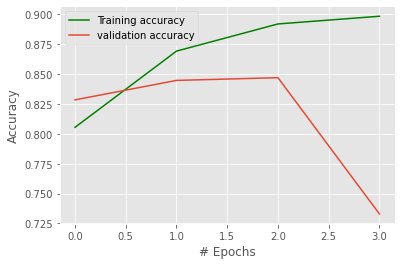

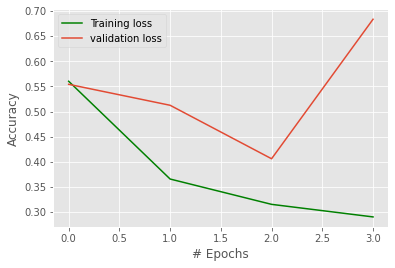

In [8]:
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['accuracy'],'r',label='Training accuracy',color='green')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("demo1/InceptionResNetV2_acc.png")
plt.show()


plt.style.use("ggplot")
plt.figure()
plt.plot(history.history['loss'],'r',label='Training loss',color='green')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("demo1/InceptionResNetV2_loss.png")
plt.show()

In [9]:
class_names = ['COVID-19','Normal','Viral Pneumonia', 'Lung_Opacity']
y_pred = model.predict(test_generator)
print(class_names[np.argmax(y_pred[2])])

Viral Pneumonia


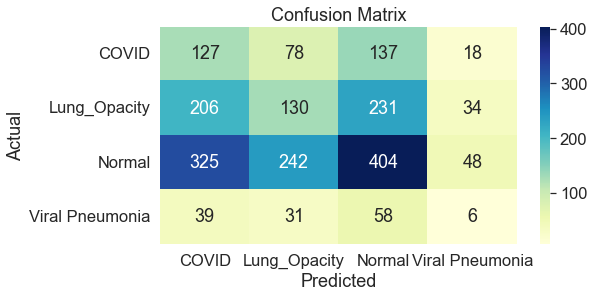

In [10]:
y_pred = model.predict(test_generator) # predict on test_generator

y_pred_classes = np.argmax(y_pred, axis=1) # obtain predicted class labels

conf_mat = confusion_matrix(test_generator.classes, y_pred_classes)

class_names = list(test_generator.class_indices.keys())

conf_mat_df = pd.DataFrame(conf_mat, index=class_names, columns=class_names)

plt.figure(figsize=(8,4))
sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

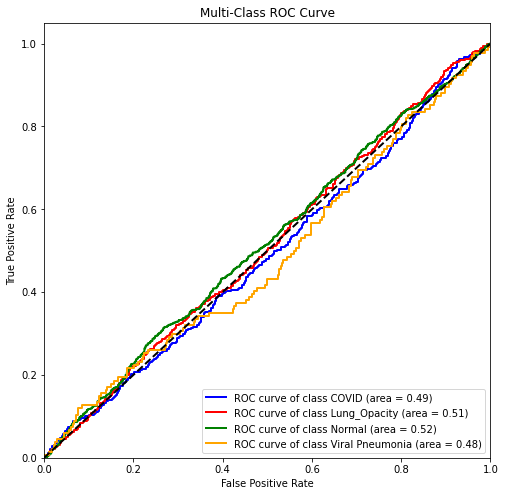

In [6]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import keras

# Load the saved model
model = keras.models.load_model('demo1/InceptionResnetv2.h5')

class_names = list(test_generator.class_indices.keys())
# Make predictions on the test data
y_pred_proba = model.predict(test_generator)

# Calculate the AUC for each class
lb = LabelBinarizer()
lb.fit(test_generator.classes)
y_true = lb.transform(test_generator.classes)
aucs = []
for i in range(test_generator.num_classes):
    auc = roc_auc_score(y_true[:, i], y_pred_proba[:, i])
    aucs.append(auc)
    
# Plot the ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(test_generator.num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred_proba[:, i])
    roc_auc[i] = aucs[i]
    
plt.figure(figsize=(8, 8))
colors = ['blue', 'red', 'green', 'orange']
for i, color in zip(range(test_generator.num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(class_names[i], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [11]:
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels
y_true = test_generator.classes

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-score: {f1_score:.3f}')

Precision: 0.351
Recall: 0.318
F1-score: 0.328


In [12]:
from sklearn.metrics import classification_report

# Generate predictions for all test data
y_pred = model.predict_generator(test_generator)

# Extract predicted labels batch by batch
y_pred_classes = []
for i in range(len(test_generator)):
    x_batch, y_batch = next(test_generator)
    y_pred_batch = model.predict(x_batch)
    y_pred_batch_classes = np.argmax(y_pred_batch, axis=1)
    y_pred_classes.extend(y_pred_batch_classes)

# Concatenate predicted labels for all test data
y_true = test_generator.classes
y_pred_classes = np.array(y_pred_classes)

# Print classification report
target_names = test_generator.class_indices.keys()
print(classification_report(y_true, y_pred_classes, target_names=target_names))


C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


                 precision    recall  f1-score   support

          COVID       0.18      0.35      0.24       360
   Lung_Opacity       0.27      0.23      0.25       601
         Normal       0.46      0.37      0.41      1019
Viral Pneumonia       0.03      0.02      0.03       134

       accuracy                           0.31      2114
      macro avg       0.24      0.24      0.23      2114
   weighted avg       0.33      0.31      0.31      2114

